In [1]:
import pandas as pd
import librosa
from pydub import AudioSegment
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DF_selected = pd.read_csv('./dataset/birds_spain_selected.csv')

In [158]:
audio = AudioSegment.from_mp3('./dataset/recordings/stage-1/Corvus-corax_308884.mp3')

In [159]:
audio

In [125]:
samples = audio.get_array_of_samples()

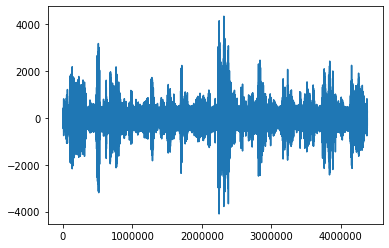

In [126]:
plt.plot(samples)

In [111]:
# from scipy.fftpack import fft
# fft_mod = np.abs(fft(y))
# fft_mod = fft_mod[0:len(fft_mod)//2]
# plt.stem(fft_mod)

In [86]:
extract = audio[:5000]

In [87]:
extract
# extract.export( file_name+'-extract.mp3', format="mp3")

In [154]:
y, sr = librosa.load('./dataset/recordings/stage-1/Corvus-corax_308884.mp3') #load the data
print(y.shape)

(1917504,)


In [131]:
# librosa.effects.split(y) # 
# librosa.effects.trim(y)

In [132]:
# librosa.effects.split(y, top_db=10)

In [152]:
y[(y > (-np.max(y)/5)) & (y < np.max(y)/5)] = 0

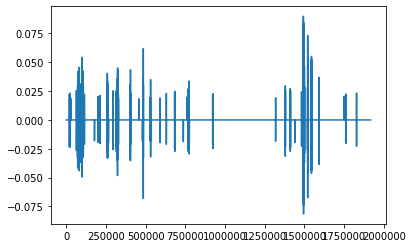

In [141]:
plt.plot(y)

In [ ]:
print(librosa.effects.split(y))

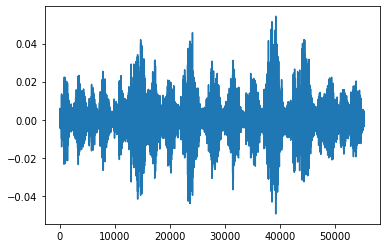

In [157]:
plt.plot(np.concatenate([y[18432:20992],y[24064:26624],y[28160:30208],y[62976:65536],
 y[66560:69120],y[70144:83968], y[86016:93696], y[94720:97792], y[98304:102912], y[103936:109056],
y[111104:115200] , y[176640:178688]  , y[198144:200704]]))
 
 

In [28]:
y[(y > (-0.05)) & (y < 0.05)] = 0

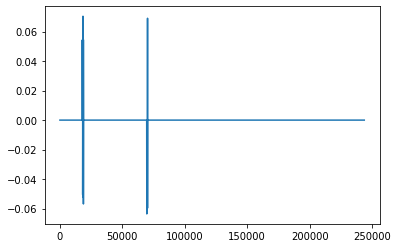

In [29]:
plt.plot(y)

In [30]:
librosa.effects.split(y)

array([[     0, 243736]])

In [ ]:
# noise gate

In [160]:
channel1 = y
audio_segment = AudioSegment(channel1.tobytes(),frame_rate=sr,
                             sample_width=channel1.dtype.itemsize,channels=1)

In [161]:
audio_segment

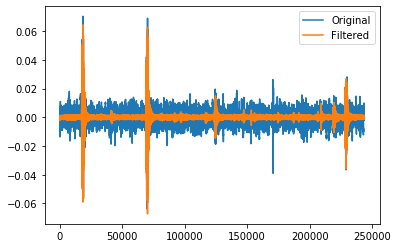

In [52]:
from scipy import signal

# Define filter cutoff frequency and degree
b, a = signal.butter(3, 1/10, btype= 'highpass')

# Apply modeled filter to data
y_filtered = signal.filtfilt(b, a, y)

plt.plot(y)
plt.plot(y_filtered)
plt.legend(["Original","Filtered"])

In [64]:
librosa.effects.split(y_filtered, top_db=20)

array([[ 16896,  21504],
       [ 68096,  73216],
       [123392, 126464],
       [218624, 221184],
       [227840, 231424]])

In [75]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

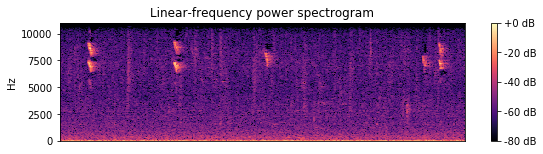

In [85]:
plt.figure(figsize=(20, 10))
import librosa.display
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')